In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

In [3]:
df=pd.read_csv('Salary 2.csv')
df

Age  Gender  Education Level              Job Title  \
0     32.0    Male                1      Software Engineer   
1     28.0  Female                2           Data Analyst   
2     45.0    Male                3                Manager   
3     36.0  Female                1        Sales Associate   
4     52.0    Male                2               Director   
...    ...     ...              ...                    ...   
6679  49.0  Female                3  Director of Marketing   
6680  32.0    Male                0        Sales Associate   
6681  30.0  Female                1      Financial Manager   
6682  46.0    Male                2      Marketing Manager   
6683  26.0  Female                0        Sales Executive   

      Years of Experience    Salary    Country        Race  Senior  
0                     5.0   90000.0         UK       White       0  
1                     3.0   65000.0        USA    Hispanic       0  
2                    15.0  150000.0     Canada       White       1  
3                     7.0   60000.0        USA    Hispanic       0  
4                    20.0  200000.0        USA       Asian       0  
...                   ...       ...        ...         ...     ...  
6679                 20.0  200000.0         UK       Mixed       0  
6680                  3.0   50000.0  Australia  Australian       0  
6681                  4.0   55000.0      China     Chinese       0  
6682                 14.0  140000.0      China      Korean       0  
6683                  1.0   35000.0     Canada       Black       0  

[6684 rows x 9 columns]

In [4]:
#Features:Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior

In [5]:
df.describe()

Age  Education Level  Years of Experience         Salary  \
count  6684.000000      6684.000000          6684.000000    6684.000000   
mean     33.610563         1.622382             8.077723  115307.175194   
std       7.595994         0.880474             6.029305   52806.810881   
min      21.000000         0.000000             0.000000     350.000000   
25%      28.000000         1.000000             3.000000   70000.000000   
50%      32.000000         1.000000             7.000000  115000.000000   
75%      38.000000         2.000000            12.000000  160000.000000   
max      62.000000         3.000000            34.000000  250000.000000   

            Senior  
count  6684.000000  
mean      0.143477  
std       0.350585  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [6]:
#Let’s check Nan 
df.isnull().sum().sum()

#And I wanna to delete these one

df = df.dropna()

In [7]:
df.isnull().sum().sum()
#Now we have not any NaN in the dataset

0

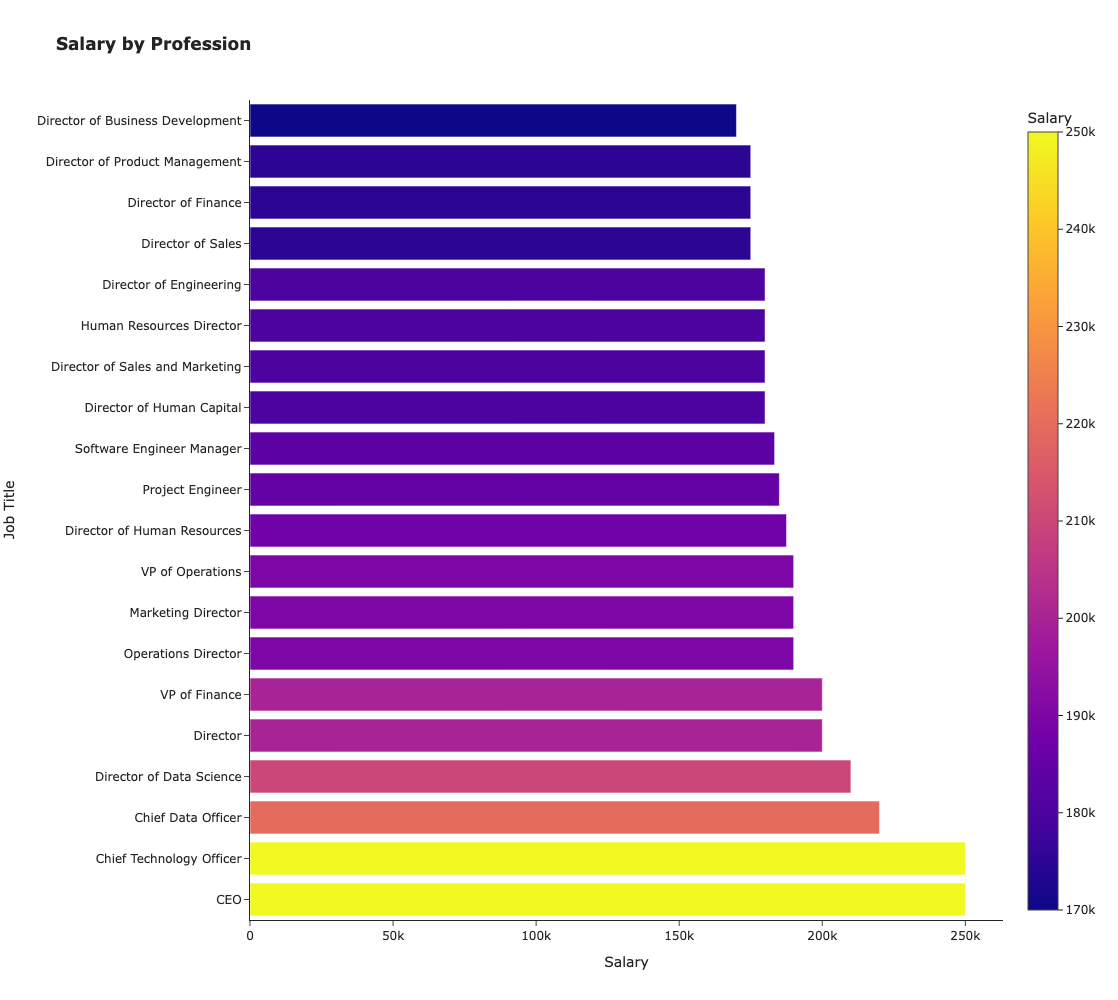

In [8]:
#Now I make want to introduce some Jobs and their Salaries 
import plotly.express as px
df=pd.read_csv('Salary 2.csv')
avg_job = df[['Job Title', 'Salary']].groupby(by='Job Title', as_index=False).median().sort_values(by='Salary', ascending=False)
#This sorts the median salary in descending order, so the highest paying jobs come first.
fig = px.bar(avg_job.iloc[:20,:], x='Salary', y='Job Title', title='<b>Salary by Profession<b>',color='Salary')
fig.update_layout(width=800, height=1000,template='simple_white')
fig.show()


In [9]:
df.duplicated().sum()

1536

In [10]:
#For accuracy, repetitions should be removed
df.drop_duplicates(inplace=True)
df.head()

Age  Gender  Education Level          Job Title  Years of Experience  \
0  32.0    Male                1  Software Engineer                  5.0   
1  28.0  Female                2       Data Analyst                  3.0   
2  45.0    Male                3            Manager                 15.0   
3  36.0  Female                1    Sales Associate                  7.0   
4  52.0    Male                2           Director                 20.0   

     Salary Country      Race  Senior  
0   90000.0      UK     White       0  
1   65000.0     USA  Hispanic       0  
2  150000.0  Canada     White       1  
3   60000.0     USA  Hispanic       0  
4  200000.0     USA     Asian       0

In [11]:
df.shape

(5148, 9)

In [12]:
#In the same way, I need to focus on at least 10 people for maximum accuracy
value_counts = df['Job Title'].value_counts()
to_remove = value_counts[value_counts<10].index
df = df[~df['Job Title'].isin(to_remove)]
df['Job Title'].value_counts()
df

Age  Gender  Education Level              Job Title  \
0     32.0    Male                1      Software Engineer   
1     28.0  Female                2           Data Analyst   
3     36.0  Female                1        Sales Associate   
5     29.0    Male                1      Marketing Analyst   
6     42.0  Female                2        Product Manager   
...    ...     ...              ...                    ...   
6678  37.0    Male                1   Sales Representative   
6679  49.0  Female                3  Director of Marketing   
6680  32.0    Male                0        Sales Associate   
6681  30.0  Female                1      Financial Manager   
6682  46.0    Male                2      Marketing Manager   

      Years of Experience    Salary    Country        Race  Senior  
0                     5.0   90000.0         UK       White       0  
1                     3.0   65000.0        USA    Hispanic       0  
3                     7.0   60000.0        USA    Hispanic       0  
5                     2.0   55000.0        USA    Hispanic       0  
6                    12.0  120000.0        USA       Asian       0  
...                   ...       ...        ...         ...     ...  
6678                  6.0   75000.0     Canada       Asian       0  
6679                 20.0  200000.0         UK       Mixed       0  
6680                  3.0   50000.0  Australia  Australian       0  
6681                  4.0   55000.0      China     Chinese       0  
6682                 14.0  140000.0      China      Korean       0  

[4989 rows x 9 columns]

In [13]:
import pandas as pd
df2 = df.groupby('Job Title')
highest_paid_jobs = df2.max().head(5)
sorted_highest_paid_jobs = highest_paid_jobs.sort_values(by='Salary', ascending=False).reset_index()
sorted_highest_paid_jobs

Job Title   Age Gender  Education Level  \
0             Data Scientist  51.0   Male                3   
1               Data Analyst  46.0   Male                3   
2  Content Marketing Manager  51.0   Male                3   
3         Back end Developer  52.0   Male                2   
4           Business Analyst  44.0   Male                3   

   Years of Experience    Salary Country   Race  Senior  
0                 24.0  240000.0     USA  White       1  
1                 19.0  195000.0     USA  White       1  
2                 19.0  190000.0     USA  White       0  
3                 25.0  178284.0     USA  White       0  
4                 15.0  150000.0     USA  White       1

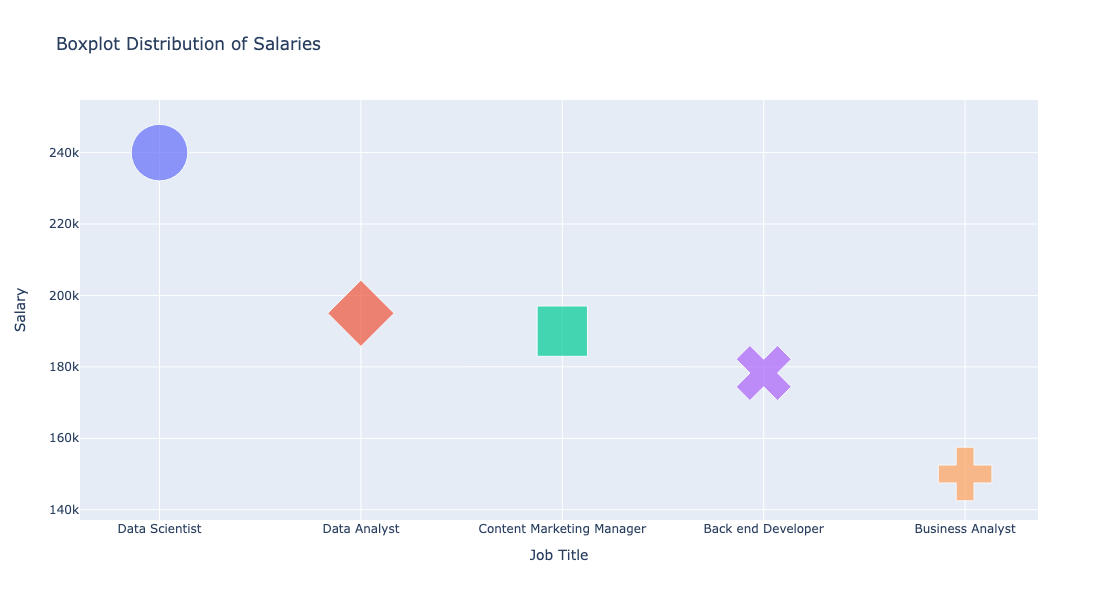

In [14]:
#Let's see what the highest paying jobs are
import pandas as pd
import plotly.express as px
fig = px.scatter(sorted_highest_paid_jobs, x='Job Title', y='Salary',
                 color='Job Title', symbol='Job Title',  # Each job title gets its own marker color
                 size='Salary', 
                 size_max=40,title='Boxplot Distribution of Salaries')

fig.update_layout(width=1000, height=600)
fig.update_layout(showlegend=False)
fig.show()


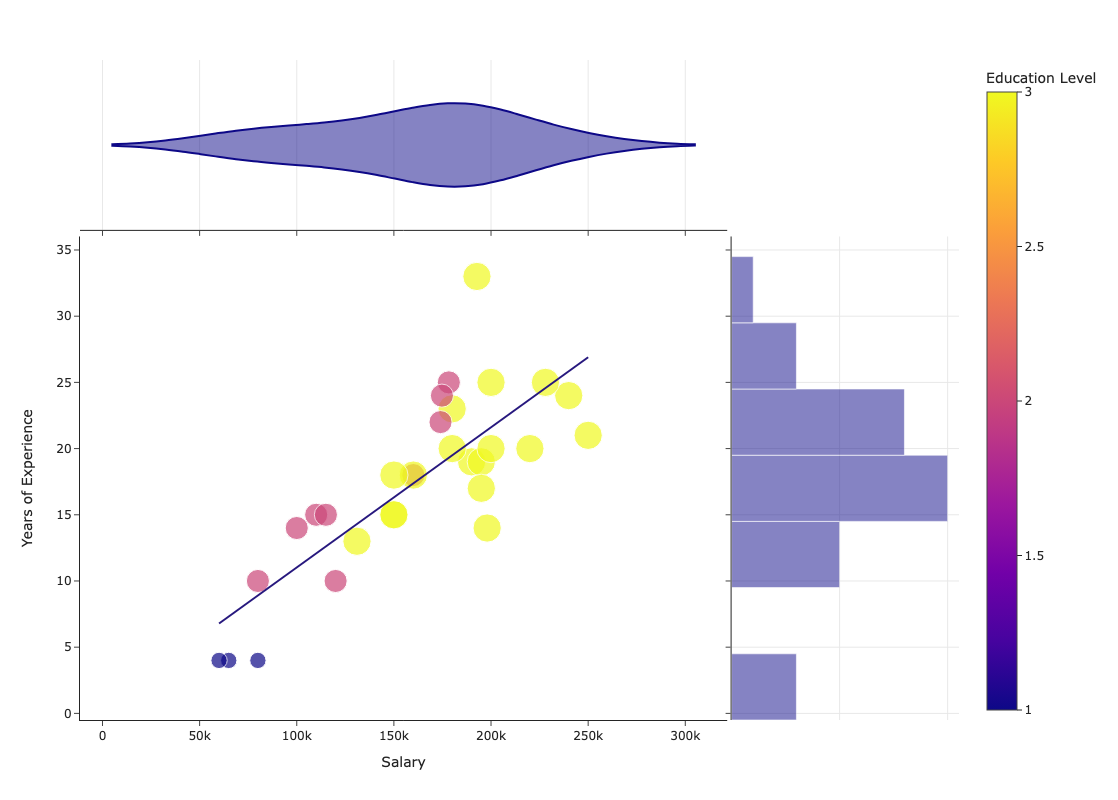

In [247]:
highest_paid_jobs = df2.max().head(30) 
fig = px.scatter(highest_paid_jobs, x="Salary", y="Years of Experience",size="Education Level", color="Education Level", marginal_x="violin",marginal_y="histogram",trendline="ols",
                trendline_color_override='#27187e')
fig.update_layout(width=1000, height=800,template='simple_white')
fig.show()
# So, it seems education level plays a better role in improving someone's salary. Let's see if this applies to the dataset of the top 30 highest paying job titles.

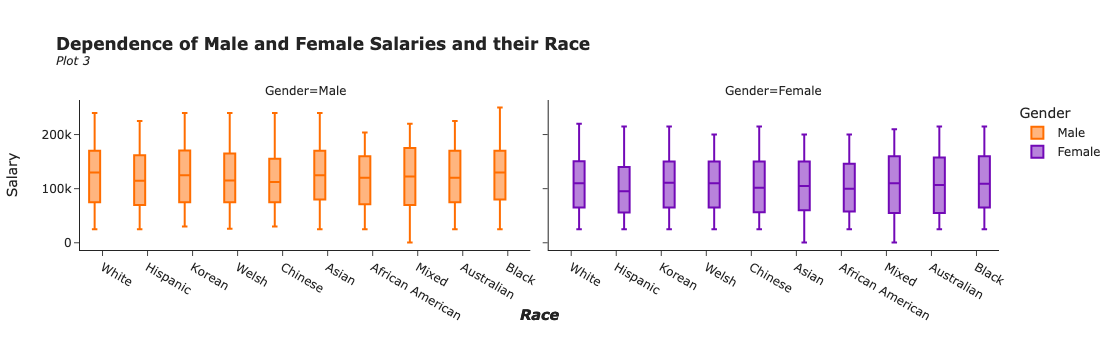

In [255]:
color_mapping = {'Male': '#ff6d00', 'Female': '#7209b7'}
fig = px.box(
    df,
    x="Race",
    y="Salary",color_discrete_map=color_mapping,
    facet_col="Gender",template='simple_white', color="Gender",title='<b>Dependence of Male and Female Salaries and their Race</b><br><sup><i>Plot 3<i></sup>')
for i in range(len(fig.data)):
    fig.update_xaxes(title_text="", row=1, col=i+1)
    fig.add_annotation(
    dict(
        x=0.5,
        y=-0.50,
        xref='paper',
        yref='paper',
        text='<b><i>Race<i><b>',
        showarrow=False,
        font=dict(size=14.5),
    ))
fig.show()
# Ok. So mens' salaries are a little bit inelastic to education level compared to female salaries.
#The male and female distributions are about the same

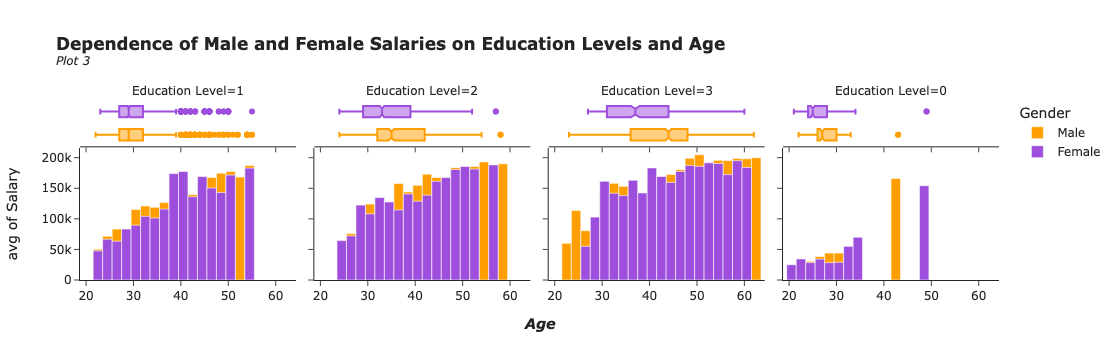

In [254]:
fig = px.histogram(
    df,
    x="Age",
    y="Salary",
    color="Gender",
    facet_col="Education Level",color_discrete_map={'Male': '#ff9e00', 'Female':'#9d4edd'},
    histfunc='avg', marginal="box",
title='<b>Dependence of Male and Female Salaries on Education Levels and Age</b><br><sup><i>Plot 3<i></sup>',template='simple_white',
    nbins=40,  # Number of bins for the histograms
)

# Update layout for better presentation
fig.update_layout(
    barmode="overlay",
    showlegend=True)
for i in range(len(fig.data)):
    fig.update_xaxes(title_text="", row=1, col=i+1)
fig.add_annotation(
    dict(
        x=0.5,
        y=-0.30,
        xref='paper',
        yref='paper',
        text='<b><i>Age<i><b>',
        showarrow=False,
        font=dict(size=11.5),
    ))
# Show the figure
fig.show()

In [258]:
df2=pd.read_csv('Salary 2.csv')

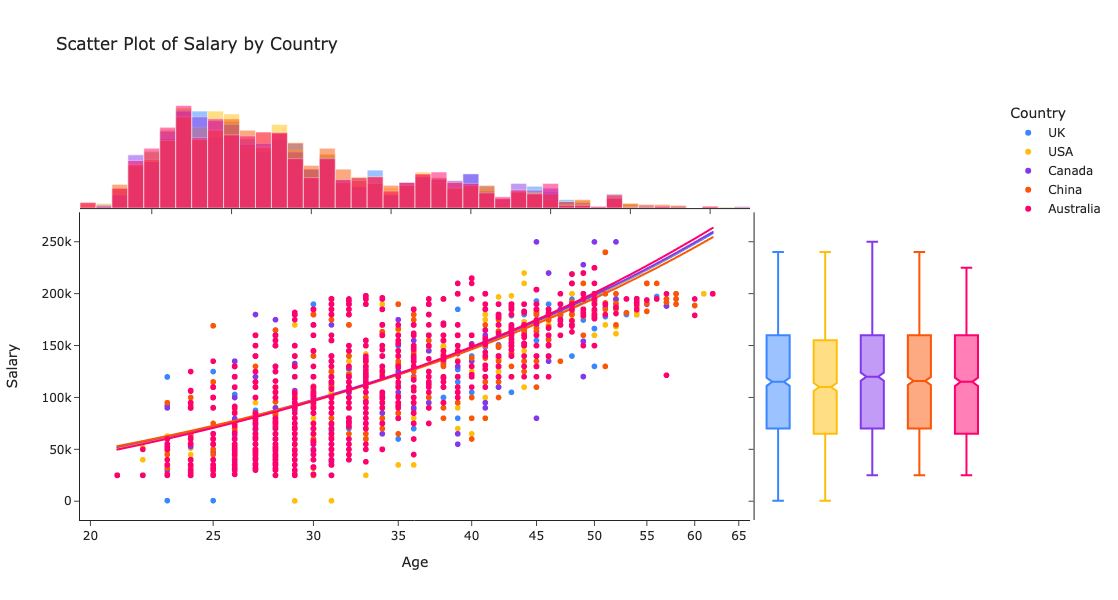

In [260]:
import plotly.express as px
fig = px.scatter(df2, x="Age", y="Salary", color="Country",marginal_x="histogram", 
                 color_discrete_map={'UK': '#3a86ff', 'USA':'#ffbe0b', 'Canada': '#8338ec','China': '#fb5607','Australia': '#ff006e'},
                 title='<b>Dependence Salary by Country</b><br><sup><i>Plot 3<i></sup>',template='simple_white',
                 trendline="ols",marginal_y="box").update_layout(xaxis_type="log")
fig.update_layout(title_text='Scatter Plot of Salary by Country', width=1000, height=600)
fig.show()
#Let's look at the distribution of wages in different countries

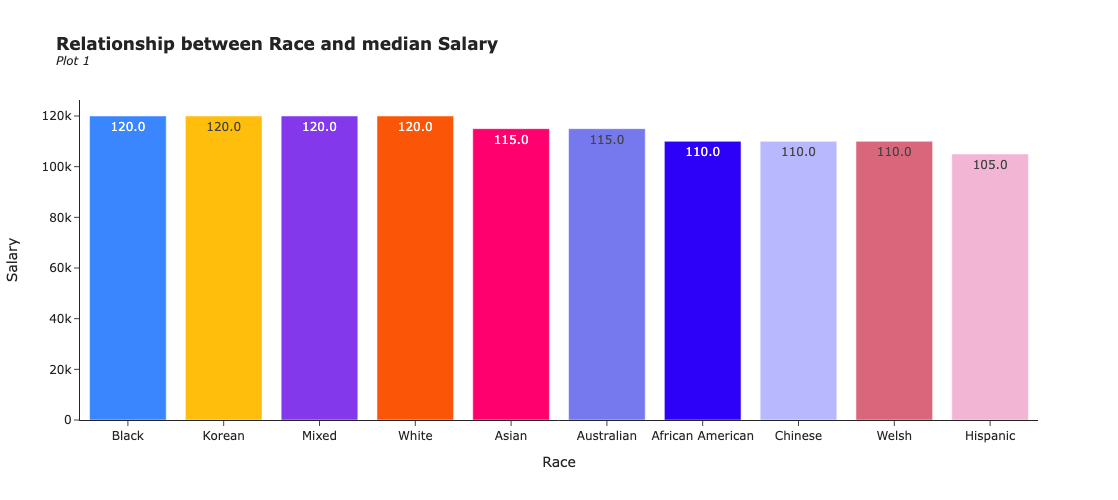

In [286]:
import pandas as pd
import plotly.express as px
df2=pd.read_csv('Salary 2.csv')
# Aggregate the data by taking the meadian salary for each race
df_aggregated = df2.groupby('Race', as_index=False)['Salary'].median().sort_values("Salary", ascending=False)
fig = px.bar(df_aggregated, x='Race', y='Salary', color='Race',
             color_discrete_map={'Black': '#3a86ff', 'Korean':'#ffbe0b', 'Mixed': '#8338ec','White': '#fb5607','Asian': '#ff006e','Australian': '#7678ed',
                                'African American': '#2d00f7','Chinese': '#b8b8ff','Welsh': '#da667b','Hispanic': '#f2b5d4'},
             title='<b>Relationship between Race and median Salary</b><br><sup><i>Plot 1<i></sup>',text = df_aggregated['Salary'].apply(lambda x: f'{x/1000:.1f}'), template='simple_white')

fig.update_layout(width=800, height=500)
fig.update_layout(showlegend=False)
fig.show()
#There doesn't seem to be any discrimination here

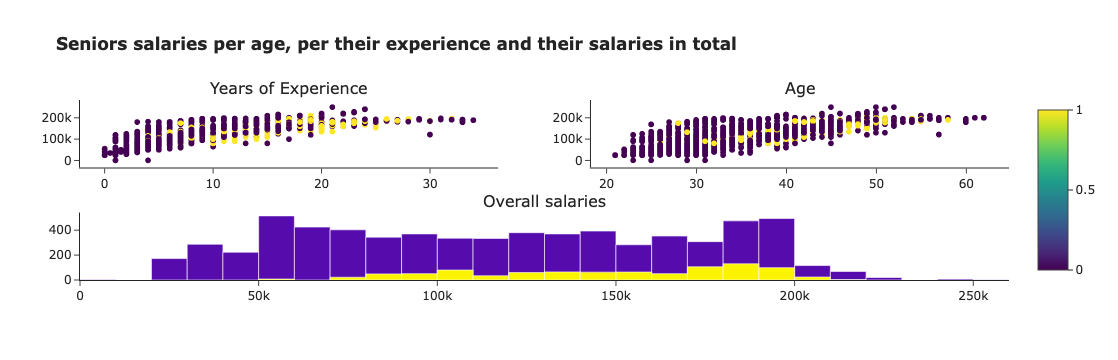

In [267]:
import plotly.express as px
from plotly.subplots import make_subplots
df2 = pd.read_csv('Salary 2.csv')
fig = make_subplots(
    rows=2,
    cols=2,specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=[
        'Years of Experience',
        'Age',
        'Overall salaries'
    ]
)
# Scatter plot for Years of Experience vs Salary
scatter_1 = px.scatter(
    df,
    x="Years of Experience",
    y="Salary",
    color="Senior", 
    title='Years of Experience vs Salary')
fig.add_trace(scatter_1['data'][0], row=1, col=1)
# Scatter plot for Age vs Salary
scatter_2 = px.scatter(
    df2,
    x="Age",
    y="Salary", color="Senior",
    color_discrete_map=senior_color_mapping, # Specify color
    title='Age vs Salary'
)
fig.add_trace(scatter_2['data'][0], row=1, col=2)

# Histograms for All Salaries and Senior Salaries
histogram_all_salaries = px.histogram(df2, x="Salary", nbins=30, color_discrete_sequence=['#560bad'], histfunc='count', title='All Salaries')
histogram_senior_salaries = px.histogram(df[df['Senior'] == 1], x="Salary", nbins=30, color_discrete_sequence=['#fcf300'], histfunc='count', title='Senior Salaries')

fig.add_trace(histogram_all_salaries['data'][0], row=2, col=1)
fig.add_trace(histogram_senior_salaries['data'][0], row=2, col=1)
fig.update_layout(
    title_text='<b>Seniors salaries per age, per their experience and their salaries in total</b>',
    height=700,
    template='simple_white',
    barmode='overlay'
)

#Consider some of the dependencies, but for the seniors
fig.show()


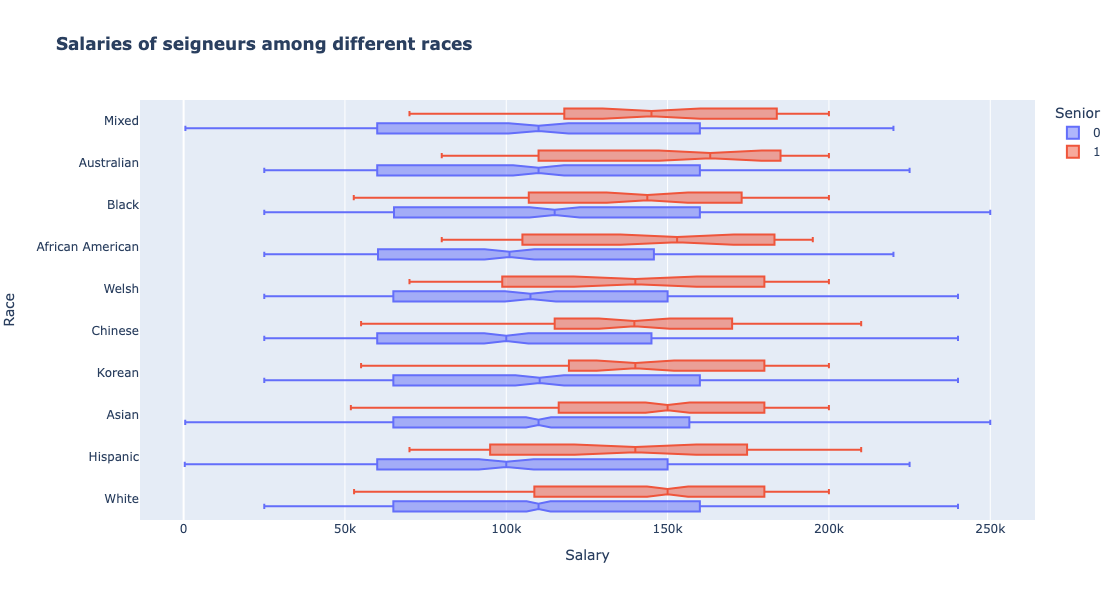

In [268]:
import plotly.express as px
fig = px.box(df2, x='Salary', y='Race', color='Senior', notched=True,
             title='<b>Salaries of seigneurs among different races<b>')
fig.update_layout(width=1000, height=600)
fig.show()


In [299]:
#I needed to add some columns to be able to count for data cleanup
#I decided to do a column on starting a career.
df['Career_launch']=df['Age']-df['Years of Experience']
df.head()

Age  Gender  Education Level          Job Title  Years of Experience  \
0  32.0    Male                1  Software Engineer                  5.0   
1  28.0  Female                2       Data Analyst                  3.0   
2  45.0    Male                3            Manager                 15.0   
3  36.0  Female                1    Sales Associate                  7.0   
4  52.0    Male                2           Director                 20.0   

     Salary Country      Race  Senior  Career_launch  
0   90000.0      UK     White       0           27.0  
1   65000.0     USA  Hispanic       0           25.0  
2  150000.0  Canada     White       1           30.0  
3   60000.0     USA  Hispanic       0           29.0  
4  200000.0     USA     Asian       0           32.0

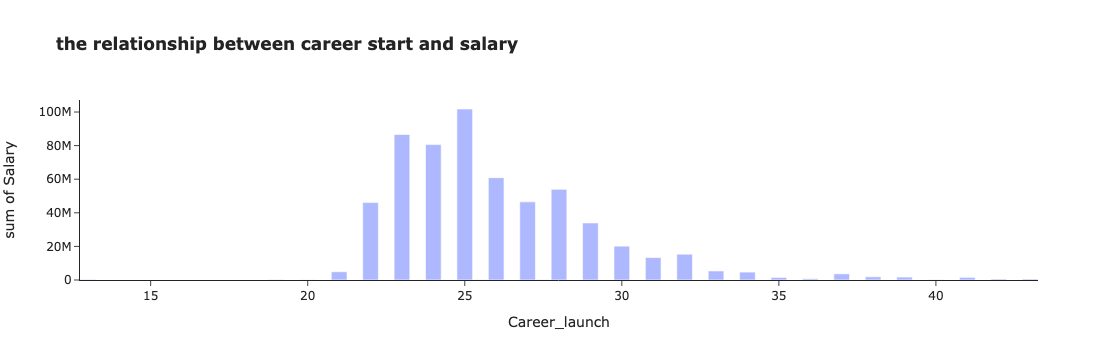

In [300]:
fig = px.histogram(df, x='Career_launch', y='Salary',template='simple_white',color_discrete_sequence=['#aeb8fe'],
                  title='<b>the relationship between career start and salary<b>')
fig.show()

In [301]:
df2 = pd.get_dummies(df, columns = ["Gender"])
df2.head()

Age  Education Level          Job Title  Years of Experience    Salary  \
0  32.0                1  Software Engineer                  5.0   90000.0   
1  28.0                2       Data Analyst                  3.0   65000.0   
2  45.0                3            Manager                 15.0  150000.0   
3  36.0                1    Sales Associate                  7.0   60000.0   
4  52.0                2           Director                 20.0  200000.0   

  Country      Race  Senior  Career_launch  Gender_Female  Gender_Male  
0      UK     White       0           27.0          False         True  
1     USA  Hispanic       0           25.0           True        False  
2  Canada     White       1           30.0          False         True  
3     USA  Hispanic       0           29.0           True        False  
4     USA     Asian       0           32.0          False         True

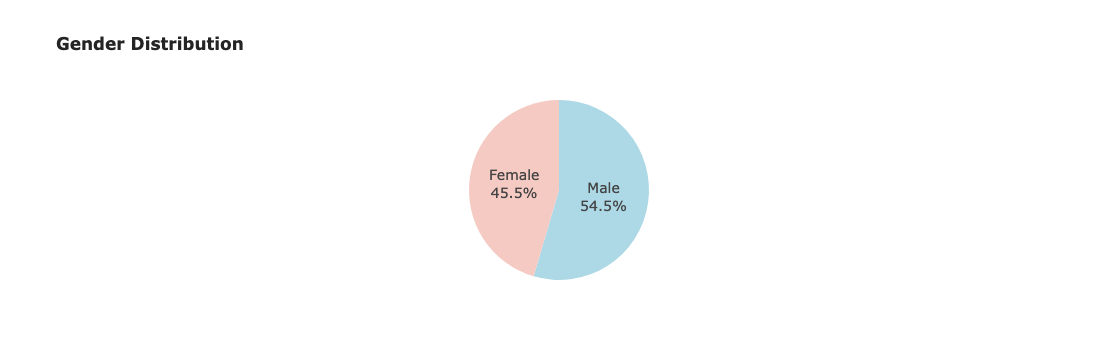

In [303]:
import plotly.express as px
male_count = df2["Gender_Male"].sum()
female_count = df2["Gender_Female"].sum()

labels = ["Male", "Female"]
sizes = [male_count, female_count]
colors = ["lightblue", '#f5cac3']

fig = px.pie(
    values=sizes,names=labels, color=labels, template='simple_white',
    color_discrete_map=dict(zip(labels, colors)),
    title="<b>Gender Distribution<b>",
)

fig.update_traces(textinfo="percent+label", textfont_size=14)
fig.update_layout(showlegend=False)
fig.show()

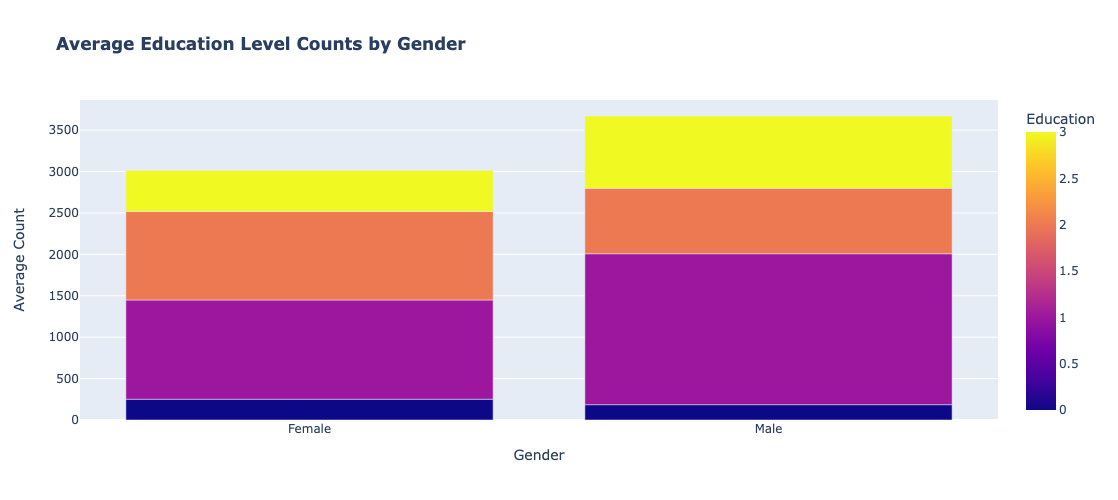

In [274]:
import pandas as pd
import plotly.express as px
df = pd.read_csv('Salary 2.csv')
avg_counts = df.groupby(['Gender', 'Education Level']).size().reset_index(name='Average Count')
fig = px.bar(avg_counts, x='Gender', y='Average Count', color='Education Level',
             labels={'Education Level': 'Education'},
             title='<b>Average Education Level Counts by Gender<b>')
fig.update_layout(width=800, height=500)
fig.show()
#Let's look at how many women and men there are in general and their distribution by education